# November ??th, 2021

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
remove = [
    'checked_transforms',
    'checked_transforms.1',
    '*funconn.matr',
    'Merge data24/',
    'RotOptical_mask',
    'preprocessed_wogsr.nii.gz',
    'preprocessed_wgsr_resliced2ref.nii.gz',
    'preprocessed_wo_gsr_resliced2ref.nii.gz',
    'ref_resliced_to_anat*.nii.gz',
    'Unnamed: 18',
    'Unnamed: 19',
    'Born',
    'Surgery',
    'Off Bruker',
    'Convert',
    'AngioMask',
    'Project',
    'Motion BIS',
    '"Mean" fMRI',
    'AnatSkullStrip',
    'fmri_reslice_to_anat',
    'Anat2Conv',
    'Conv2fMRI',
    'Angio2Anat',
    'Angio2RotOptical',
    'redo_preproc (w_gsr)',
    'preprocessed.nii.gz',
]

In [3]:
cfg = Config()
meta_dir = pjoin(cfg.base_dir, 'meta_info')

dfs_all = {}
files_all = []
for ses_i in cfg.ses_ids:
    name = f"SLC_ses-{ses_i}.csv"
    df = pd.read_csv(pjoin(meta_dir, name))
    df = df.drop(columns=remove)
    save_obj(
        obj=df,
        file_name=name.split('.')[0],
        save_dir=meta_dir,
        mode='df',
    )
    files = [
        e.split(' ')[0].split('*')[0] for e
        in df[df.columns[0]].values.tolist()
    ]
    files_all.append(files)
    print(df[['LED stim.', 'Rest runs']])
    dfs_all[ses_i] = df

[PROGRESS] 'SLC_ses-1.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

LED stim.   Rest runs
0   8,13,17  4,11,15,19
1   7,11,15   5,9,13,17
2   7,11,15   5,9,13,17
3  13,17,21  9,15,19,23
4   8,12,16     5,10,18
5   7,11,15   4,9,13,17
6   7,11,15   5,9,18,17
7   8,12,16  6,10,14,18
8   7,11,15   5,9,13,17
9   8,12,16  5,10,14,18

[PROGRESS] 'SLC_ses-2.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

LED stim.     Rest runs
0   8,12,16    6,10,14,18
1   7,11,15     5,9,13,17
2   7,11,15     5,9,13,17
3   7,11,15     5,9,13,17
4   7,11,15     5,9,13,17
5   7,11,15     5,9,13,17
6   7,11,15    4, 9,13,17
7   7,11,15     5,9,13,17
8   7,11,15  4,9,13,16,19
9   7,19,16     5,9,14,20

[PROGRESS] 'SLC_ses-3.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

LED stim.   Rest runs
0   7,11,15   5,9,13,17
1   7,11,15   5,9,13,17
2   7,11,16   5,9,13,17
3   7,11,15   5,9,13,17
4   8,10,14  6,12,16,18
5   7,11,15   5,9,13,18
6   7,11,18   5,9,13,17
7   7,11,15   5,9,13,17
8   7,11,15  5,18,13,17
9   7,11,15   5,9,13,17

In [5]:
files_all

[
    [
        '20190109_095315_2019_01_09_tiger1_01_black_1_1',
        '20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1',
        '20190109_162654_2019_01_09_tiger1_03_yellow_1_1',
        '20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1',
        '20190110_125836_2019_01_10_tiger1_05_yellow_1_1',
        '20190110_162209_2019_01_10_tiger1_06_black_1_1',
        '20190321_083520_2019_03_21_TIGRE1_mouse55_1_1',
        '20190321_114003_2019_03_21_TIGRE1_mouse57_1_1',
        '20190321_144347_2019_03_21_TIGRE1_mouse56_1_1',
        '20190509_145131_2019_05_09_SLC1_mouse73_1_1'
    ],
    [
        '20190118_145852_2019_01_18_tigre1_Black_1_1',
        '20190117_154845_2019_01_17_tigre1_blackNoTape_1_1',
        '20190118_115410_2019_01_18_tigre1_yellow_1_1',
        '20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1',
        '20190118_180350_2019_01_18_tigre1_yellow2_1_1',
        '20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1',
        '20190417_121607_2019_04_17_TIGRE1_mouse55_1_1',
        '20190417_091516_2019_04_17_TIGRE3_mouse57_1_1',
        '20190417_151734_2019_04_17_TIGRE1_mouse56_1_1',
        '20190524_152549_2019_05_24_SLC2_mouse73_1_1'
    ],
    [
        '20190122_165747_2019_01_22_tigre1_Black_1_1',
        '20190123_145514_2019_01_23_tigre1_Black1_1_1',
        '20190123_085640_2019_01_23_tigre1_yellow_1_1_1',
        '20190123_115916_2019_01_23_tigre1_yellow2_1_1',
        '20190129_155337_2019_01_29_tigre1_yellow3_1_1',
        '20190123_175300_2019_01_23_tigre1_Black2_1_1',
        '20190424_082615_2019_04_24_SLC3_mouse57_1_1',
        '20190424_113356_2019_04_24_SLC3_mouse56_1_1',
        '20190424_143043_2019_04_24_SLC3_mouse55_1_1',
        '20190529_153936_2019_05_29_SLC3_mouse73_1_1'
    ]
]

In [6]:
files_combined = [e for flist in files_all for e in flist]

In [7]:
len(files_combined), len(set(files_combined))

(30, 30)

In [8]:
files_combined

[
    '20190109_095315_2019_01_09_tiger1_01_black_1_1',
    '20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1',
    '20190109_162654_2019_01_09_tiger1_03_yellow_1_1',
    '20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1',
    '20190110_125836_2019_01_10_tiger1_05_yellow_1_1',
    '20190110_162209_2019_01_10_tiger1_06_black_1_1',
    '20190321_083520_2019_03_21_TIGRE1_mouse55_1_1',
    '20190321_114003_2019_03_21_TIGRE1_mouse57_1_1',
    '20190321_144347_2019_03_21_TIGRE1_mouse56_1_1',
    '20190509_145131_2019_05_09_SLC1_mouse73_1_1',
    '20190118_145852_2019_01_18_tigre1_Black_1_1',
    '20190117_154845_2019_01_17_tigre1_blackNoTape_1_1',
    '20190118_115410_2019_01_18_tigre1_yellow_1_1',
    '20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1',
    '20190118_180350_2019_01_18_tigre1_yellow2_1_1',
    '20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1',
    '20190417_121607_2019_04_17_TIGRE1_mouse55_1_1',
    '20190417_091516_2019_04_17_TIGRE3_mouse57_1_1',
    '20190417_151734_2019_04_17_TIGRE1_mouse56_1_1',
    '20190524_152549_2019_05_24_SLC2_mouse73_1_1',
    '20190122_165747_2019_01_22_tigre1_Black_1_1',
    '20190123_145514_2019_01_23_tigre1_Black1_1_1',
    '20190123_085640_2019_01_23_tigre1_yellow_1_1_1',
    '20190123_115916_2019_01_23_tigre1_yellow2_1_1',
    '20190129_155337_2019_01_29_tigre1_yellow3_1_1',
    '20190123_175300_2019_01_23_tigre1_Black2_1_1',
    '20190424_082615_2019_04_24_SLC3_mouse57_1_1',
    '20190424_113356_2019_04_24_SLC3_mouse56_1_1',
    '20190424_143043_2019_04_24_SLC3_mouse55_1_1',
    '20190529_153936_2019_05_29_SLC3_mouse73_1_1'
]

In [9]:
dates = [
    f.replace('-', '').replace('_', '')[:8] for f
    in os.listdir(pjoin(cfg.download_dir, 'scp'))
    if '.txt' not in f
]

In [10]:
len(dates), len(set(dates))

(210, 14)

In [11]:
def filter_fn(file, date: str, animal: str = None, color: str = None):
    cond = file.replace('-', '').replace('_', '')[:8] == date
    if animal is not None:
        cond = cond and animal in file
    if color is not None:
        cond = cond and color.lower() in file.lower()
    return cond

In [17]:
base_pat = 'preprocessed_wgsr_resliced2ref.nii.gz'
bad_ones = collections.defaultdict(list)
for sub_i in cfg.sub_ids:
    for ses_i in cfg.ses_ids:
        final_id = f"BIS_output_SLC{sub_i:02d}-{ses_i:02d}"
        
        # if final_id != 'BIS_output_SLC03-03':
         #    continue
        
        df = dfs_all[ses_i]
        _df = df.loc[df['Final_ID (data24/)'] == final_id]
        file_name = _df.values.ravel()[0]
        
        if final_id == 'BIS_output_SLC06-01':
            date = '20180109'
        else:
            date = file_name.split('_')[0]
        try:
            animal = next(
                e for e in file_name.split('_')
                if 'mouse' in e
            )
        except StopIteration:
            animal = None
 
        if final_id == 'BIS_output_SLC06-02':
            color = 'yellow_tapegone'
        elif final_id == 'BIS_output_SLC03-01':
            color = '_yellowNoTape_'
        elif final_id in [
            'BIS_output_SLC03-02',
            'BIS_output_SLC03-03',
            'BIS_output_SLC05-01']:
            color = '_yellow_'
        else:
            try:
                color = next(
                    e for e in file_name.split('_') if
                    'black' in e.lower() or 'yellow' in e.lower()
                )
                color = color.replace('NoTape', '')
            except StopIteration:
                color = None

        matches = [
            f for f in os.listdir(pjoin(cfg.download_dir, 'scp'))
            if filter_fn(f, date=date, animal=animal, color=color)
        ]
        
        if final_id =='BIS_output_SLC03-02':
            matches = [e for e in matches if 'tapegone' not in e]
        
        if len(matches) > 8:
            print(len(matches), final_id, matches)

        runs_led = tuple(map(
            lambda s: int(s),
            _df['LED stim.'].values.item().split(',')
        ))
        runs_rest = tuple(map(
            lambda s: int(s),
            _df['Rest runs'].values.item().split(',')
        ))
        runs_all = sorted(runs_led + runs_rest)
        
        runs = {}
        for run_i, run in enumerate(runs_all, start=1):
            if run in runs_led:
                run_lbl = 'led'
            elif run in runs_rest:
                run_lbl = 'rest'
            else:
                raise RuntimeError()
            runs[run_i] = (run_lbl, run)
            
            if final_id == 'BIS_output_SLC10-01':
                pat = f"_s{run:02d}_{base_pat}"
            else:
                pat = f"_s{run}_{base_pat}"
                
            try:
                src = next(
                    f for f in matches
                    if pat in f
                )
            except StopIteration:
                bad_ones[final_id].append(run)
            
            dst = [
                f"sub-SLC{sub_i:02d}",
                f"ses-{ses_i}",
                f"run-{run_i}",
                f"task-{run_lbl}",
                'space-N162',
                'desc-gsr',
                'bold'
            ]
            dst = '_'.join(dst)
            dst = f"{dst}.nii.gz"
            
            shutil.copyfile(
                src=pjoin(cfg.download_dir, 'scp', src),
                dst=pjoin(cfg.raw_dir, dst),
            )
            
            print(sub_i, ses_i, final_id, file_name, '\n', run, src, '\n', run_i, run_lbl, dst)
        print(runs)
        print('-' * 80, '\n\n')

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 4 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s4_preprocessed_wgsr_res
liced2ref.nii.gz 
 1 rest sub-SLC01_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 8 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s8_preprocessed_wgsr_res
liced2ref.nii.gz 
 2 led sub-SLC01_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 11 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s11_preprocessed_wgsr_r
esliced2ref.nii.gz 
 3 rest sub-SLC01_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 13 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s13_preprocessed_wgsr_r
esliced2ref.nii.gz 
 4 led sub-SLC01_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 15 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s15_preprocessed_wgsr_r
esliced2ref.nii.gz 
 5 rest sub-SLC01_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 17 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s17_preprocessed_wgsr_r
esliced2ref.nii.gz 
 6 led sub-SLC01_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

1 1 BIS_output_SLC01-01 20190109_095315_2019_01_09_tiger1_01_black_1_1 
 19 2019_01_09_tiger1-01_black_s4_EPI_lps__2019_01_09_tiger1-01_black_s19_preprocessed_wgsr_r
esliced2ref.nii.gz 
 7 rest sub-SLC01_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 4),
    2: ('led', 8),
    3: ('rest', 11),
    4: ('led', 13),
    5: ('rest', 15),
    6: ('led', 17),
    7: ('rest', 19)
}

--------------------------------------------------------------------------------

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 6 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s6_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC01_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 8 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s8_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC01_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 10 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s10_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 rest sub-SLC01_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 12 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s12_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC01_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 14 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s14_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC01_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 16 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s16_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC01_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

1 2 BIS_output_SLC01-02 20190118_145852_2019_01_18_tigre1_Black_1_1 
 18 2019-01-18_tigre1_Black_s6_EPI_lps__2019-01-18_tigre1_Black_s18_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC01_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 6),
    2: ('led', 8),
    3: ('rest', 10),
    4: ('led', 12),
    5: ('rest', 14),
    6: ('led', 16),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 5 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s5_preprocessed_wgsr_reslice
d2ref.nii.gz 
 1 rest sub-SLC01_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 7 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s7_preprocessed_wgsr_reslice
d2ref.nii.gz 
 2 led sub-SLC01_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 9 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s9_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 rest sub-SLC01_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 11 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s11_preprocessed_wgsr_resli
ced2ref.nii.gz 
 4 led sub-SLC01_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 13 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s13_preprocessed_wgsr_resli
ced2ref.nii.gz 
 5 rest sub-SLC01_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 15 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s15_preprocessed_wgsr_resli
ced2ref.nii.gz 
 6 led sub-SLC01_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

1 3 BIS_output_SLC01-03 20190123_145514_2019_01_23_tigre1_Black1_1_1 
 17 2019-01-23_tigre1_Black1_s5_EPI_lps__2019-01-23_tigre1_Black1_s17_preprocessed_wgsr_resli
ced2ref.nii.gz 
 7 rest sub-SLC01_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 4 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s4_preprocessed_wgsr_res
liced2ref.nii.gz 
 1 rest sub-SLC02_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 7 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s7_preprocessed_wgsr_res
liced2ref.nii.gz 
 2 led sub-SLC02_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 9 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s9_preprocessed_wgsr_res
liced2ref.nii.gz 
 3 rest sub-SLC02_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 11 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s11_preprocessed_wgsr_r
esliced2ref.nii.gz 
 4 led sub-SLC02_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 13 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s13_preprocessed_wgsr_r
esliced2ref.nii.gz 
 5 rest sub-SLC02_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 15 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s15_preprocessed_wgsr_r
esliced2ref.nii.gz 
 6 led sub-SLC02_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

2 1 BIS_output_SLC02-01 20190110_162209_2019_01_10_tiger1_06_black_1_1 
 17 2019-01-10_tiger1-06_black_s4_EPI_lps__2019-01-10_tiger1-06_black_s17_preprocessed_wgsr_r
esliced2ref.nii.gz 
 7 rest sub-SLC02_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 4),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 5 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s5_preprocessed_wg
sr_resliced2ref.nii.gz 
 1 rest sub-SLC02_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 7 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s7_preprocessed_wg
sr_resliced2ref.nii.gz 
 2 led sub-SLC02_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 9 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s9_preprocessed_wg
sr_resliced2ref.nii.gz 
 3 rest sub-SLC02_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 11 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s11_preprocessed_
wgsr_resliced2ref.nii.gz 
 4 led sub-SLC02_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 13 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s13_preprocessed_
wgsr_resliced2ref.nii.gz 
 5 rest sub-SLC02_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 15 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s15_preprocessed_
wgsr_resliced2ref.nii.gz 
 6 led sub-SLC02_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

2 2 BIS_output_SLC02-02 20190117_154845_2019_01_17_tigre1_blackNoTape_1_1 
 17 2019-01-17_tigre1_blackNoTape_s5_EPI_lps__2019-01-17_tigre1_blackNoTape_s17_preprocessed_
wgsr_resliced2ref.nii.gz 
 7 rest sub-SLC02_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 5 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC02_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 7 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC02_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 9 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s9_preprocessed_wgsr_resliced2
ref.nii.gz 
 3 rest sub-SLC02_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 11 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s11_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC02_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 13 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s13_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC02_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 15 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s15_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC02_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

2 3 BIS_output_SLC02-03 20190122_165747_2019_01_22_tigre1_Black_1_1 
 17 2019-01-22_tigre1_Black_s5_EPI_lps__2019-01-22_tigre1_Black_s17_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC02_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 9 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s9_pre
processed_wgsr_resliced2ref.nii.gz 
 1 rest sub-SLC03_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 13 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s13_p
reprocessed_wgsr_resliced2ref.nii.gz 
 2 led sub-SLC03_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 15 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s15_p
reprocessed_wgsr_resliced2ref.nii.gz 
 3 rest sub-SLC03_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 17 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s17_p
reprocessed_wgsr_resliced2ref.nii.gz 
 4 led sub-SLC03_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 19 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s19_p
reprocessed_wgsr_resliced2ref.nii.gz 
 5 rest sub-SLC03_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 21 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s21_p
reprocessed_wgsr_resliced2ref.nii.gz 
 6 led sub-SLC03_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

3 1 BIS_output_SLC03-01 20190110_095857_2019_01_10_tiger1_04_yellowNoTape_3_1_1 
 23 2019_01_10_tiger1-04_yellowNoTape_3_s9_EPI_lps__2019_01_10_tiger1-04_yellowNoTape_3_s23_p
reprocessed_wgsr_resliced2ref.nii.gz 
 7 rest sub-SLC03_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 9),
    2: ('led', 13),
    3: ('rest', 15),
    4: ('led', 17),
    5: ('rest', 19),
    6: ('led', 21),
    7: ('rest', 23)
}

--------------------------------------------------------------------------------

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 5 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s5_preprocessed_wgsr_reslice
d2ref.nii.gz 
 1 rest sub-SLC03_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 7 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s7_preprocessed_wgsr_reslice
d2ref.nii.gz 
 2 led sub-SLC03_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 9 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s9_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 rest sub-SLC03_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 11 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s11_preprocessed_wgsr_resli
ced2ref.nii.gz 
 4 led sub-SLC03_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 13 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s13_preprocessed_wgsr_resli
ced2ref.nii.gz 
 5 rest sub-SLC03_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 15 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s15_preprocessed_wgsr_resli
ced2ref.nii.gz 
 6 led sub-SLC03_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

3 2 BIS_output_SLC03-02 20190118_115410_2019_01_18_tigre1_yellow_1_1 
 17 2019-01-18_tigre1_yellow_s5_EPI_lps__2019-01-18_tigre1_yellow_s17_preprocessed_wgsr_resli
ced2ref.nii.gz 
 7 rest sub-SLC03_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 5 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s5_preprocessed_wgsr_res
liced2ref.nii.gz 
 1 rest sub-SLC03_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 7 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s7_preprocessed_wgsr_res
liced2ref.nii.gz 
 2 led sub-SLC03_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 9 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s9_preprocessed_wgsr_res
liced2ref.nii.gz 
 3 rest sub-SLC03_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 11 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s11_preprocessed_wgsr_r
esliced2ref.nii.gz 
 4 led sub-SLC03_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 13 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s13_preprocessed_wgsr_r
esliced2ref.nii.gz 
 5 rest sub-SLC03_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 16 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s16_preprocessed_wgsr_r
esliced2ref.nii.gz 
 6 led sub-SLC03_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

3 3 BIS_output_SLC03-03 20190123_085640_2019_01_23_tigre1_yellow_1_1_1 
 17 2019-01-23_tigre1_yellow_1_s5_EPI_lps__2019-01-23_tigre1_yellow_1_s17_preprocessed_wgsr_r
esliced2ref.nii.gz 
 7 rest sub-SLC03_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 16),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 5 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s5_preprocessed_wgsr_r
esliced2ref.nii.gz 
 1 rest sub-SLC04_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 7 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s7_preprocessed_wgsr_r
esliced2ref.nii.gz 
 2 led sub-SLC04_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 9 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s9_preprocessed_wgsr_r
esliced2ref.nii.gz 
 3 rest sub-SLC04_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 11 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s11_preprocessed_wgsr
_resliced2ref.nii.gz 
 4 led sub-SLC04_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 13 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s13_preprocessed_wgsr
_resliced2ref.nii.gz 
 5 rest sub-SLC04_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 15 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s15_preprocessed_wgsr
_resliced2ref.nii.gz 
 6 led sub-SLC04_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

4 1 BIS_output_SLC04-01 20190109_162654_2019_01_09_tiger1_03_yellow_1_1 
 17 2019-01-09_tiger1_03_yellow_s5_EPI_lps__2019-01-09_tiger1_03_yellow_s17_preprocessed_wgsr
_resliced2ref.nii.gz 
 7 rest sub-SLC04_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 5 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s5_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC04_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 7 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC04_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 9 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC04_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 11 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC04_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 13 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC04_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 15 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC04_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

4 2 BIS_output_SLC04-02 20190118_180350_2019_01_18_tigre1_yellow2_1_1 
 17 2019-01-18_tigre1_yellow2_s5_EPI_lps__2019-01-18_tigre1_yellow2_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC04_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 5 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s5_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC04_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 7 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC04_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 9 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC04_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 11 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC04_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 13 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC04_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 15 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC04_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

4 3 BIS_output_SLC04-03 20190123_115916_2019_01_23_tigre1_yellow2_1_1 
 17 2019-01-23_tigre1_yellow2_s5_EPI_lps__2019-01-23_tigre1_yellow2_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC04_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 5 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s5_preprocessed_wgsr_r
esliced2ref.nii.gz 
 1 rest sub-SLC05_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 8 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s8_preprocessed_wgsr_r
esliced2ref.nii.gz 
 2 led sub-SLC05_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 10 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s10_preprocessed_wgsr
_resliced2ref.nii.gz 
 3 rest sub-SLC05_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 12 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s12_preprocessed_wgsr
_resliced2ref.nii.gz 
 4 led sub-SLC05_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 16 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s16_preprocessed_wgsr
_resliced2ref.nii.gz 
 5 led sub-SLC05_ses-1_run-5_task-led_space-N162_desc-gsr_bold.nii.gz

5 1 BIS_output_SLC05-01 20190110_125836_2019_01_10_tiger1_05_yellow_1_1*Gradiend overheated 
 18 2019_01_10_tiger1-05_yellow_s5_EPI_lps__2019_01_10_tiger1-05_yellow_s18_preprocessed_wgsr
_resliced2ref.nii.gz 
 6 rest sub-SLC05_ses-1_run-6_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 8),
    3: ('rest', 10),
    4: ('led', 12),
    5: ('led', 16),
    6: ('rest', 18)
}

--------------------------------------------------------------------------------

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 5 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s5_preprocessed_
wgsr_resliced2ref.nii.gz 
 1 rest sub-SLC05_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 7 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s7_preprocessed_
wgsr_resliced2ref.nii.gz 
 2 led sub-SLC05_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 9 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s9_preprocessed_
wgsr_resliced2ref.nii.gz 
 3 rest sub-SLC05_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 11 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s11_preprocesse
d_wgsr_resliced2ref.nii.gz 
 4 led sub-SLC05_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 13 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s13_preprocesse
d_wgsr_resliced2ref.nii.gz 
 5 rest sub-SLC05_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 15 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s15_preprocesse
d_wgsr_resliced2ref.nii.gz 
 6 led sub-SLC05_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

5 2 BIS_output_SLC05-02 20190122_134322_2019_01_22_tigre1_yellowNoTape_1_1 
 17 2019-01-22_tigre1_yellowNoTape_s5_EPI_lps__2019-01-22_tigre1_yellowNoTape_s17_preprocesse
d_wgsr_resliced2ref.nii.gz 
 7 rest sub-SLC05_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 6 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s6_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC05_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 8 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s8_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC05_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 10 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s10_preprocessed_wgsr_res
liced2ref.nii.gz 
 3 led sub-SLC05_ses-3_run-3_task-led_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 12 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s12_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 rest sub-SLC05_ses-3_run-4_task-rest_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 14 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s14_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 led sub-SLC05_ses-3_run-5_task-led_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 16 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s16_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 rest sub-SLC05_ses-3_run-6_task-rest_space-N162_desc-gsr_bold.nii.gz

5 3 BIS_output_SLC05-03 20190129_155337_2019_01_29_tigre1_yellow3_1_1 
 18 2019-01-29_tigre1_yellow3_s6_EPI_lps__2019-01-29_tigre1_yellow3_s18_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC05_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 6),
    2: ('led', 8),
    3: ('led', 10),
    4: ('rest', 12),
    5: ('led', 14),
    6: ('rest', 16),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 5 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s5_preproces
sed_wgsr_resliced2ref.nii.gz 
 1 rest sub-SLC06_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 7 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s7_preproces
sed_wgsr_resliced2ref.nii.gz 
 2 led sub-SLC06_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 9 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s9_preproces
sed_wgsr_resliced2ref.nii.gz 
 3 rest sub-SLC06_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 11 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s11_preproc
essed_wgsr_resliced2ref.nii.gz 
 4 led sub-SLC06_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 13 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s13_preproc
essed_wgsr_resliced2ref.nii.gz 
 5 rest sub-SLC06_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 15 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s15_preproc
essed_wgsr_resliced2ref.nii.gz 
 6 led sub-SLC06_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

6 1 BIS_output_SLC06-01 20190109_125959_2018_01_09_tiger1_02_blackNoTape_1_1*No AngioAnat 
 17 2018_01_09_tiger1-02_blackNoTape_s5_EPI_lps__2018_01_09_tiger1-02_blackNoTape_s17_preproc
essed_wgsr_resliced2ref.nii.gz 
 7 rest sub-SLC06_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 5 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s5_preproc
essed_wgsr_resliced2ref.nii.gz 
 1 rest sub-SLC06_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 7 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s7_preproc
essed_wgsr_resliced2ref.nii.gz 
 2 led sub-SLC06_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 9 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s9_preproc
essed_wgsr_resliced2ref.nii.gz 
 3 rest sub-SLC06_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 11 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s11_prepr
ocessed_wgsr_resliced2ref.nii.gz 
 4 led sub-SLC06_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 13 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s13_prepr
ocessed_wgsr_resliced2ref.nii.gz 
 5 rest sub-SLC06_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 15 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s15_prepr
ocessed_wgsr_resliced2ref.nii.gz 
 6 led sub-SLC06_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

6 2 BIS_output_SLC06-02 20190118_084900_2019_01_18_tigre1_yellow_tapegone_1_1   
 17 2019-01-18_tigre1_yellow_tapegone_s5_EPI_lps__2019-01-18_tigre1_yellow_tapegone_s17_prepr
ocessed_wgsr_resliced2ref.nii.gz 
 7 rest sub-SLC06_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 5 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s5_preprocessed_wgsr_reslice
d2ref.nii.gz 
 1 rest sub-SLC06_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 7 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s7_preprocessed_wgsr_reslice
d2ref.nii.gz 
 2 led sub-SLC06_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 9 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s9_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 rest sub-SLC06_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 11 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s11_preprocessed_wgsr_resli
ced2ref.nii.gz 
 4 led sub-SLC06_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 13 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s13_preprocessed_wgsr_resli
ced2ref.nii.gz 
 5 rest sub-SLC06_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 15 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s15_preprocessed_wgsr_resli
ced2ref.nii.gz 
 6 led sub-SLC06_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

6 3 BIS_output_SLC06-03 20190123_175300_2019_01_23_tigre1_Black2_1_1 Check optical left/right
 18 2019-01-23_tigre1_Black2_s5_EPI_lps__2019-01-23_tigre1_Black2_s18_preprocessed_wgsr_resli
ced2ref.nii.gz 
 7 rest sub-SLC06_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 5 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s5_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC07_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 7 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC07_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 9 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC07_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 11 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC07_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 15 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 led sub-SLC07_ses-1_run-5_task-led_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 17 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 rest sub-SLC07_ses-1_run-6_task-rest_space-N162_desc-gsr_bold.nii.gz

7 1 BIS_output_SLC07-01 20190321_083520_2019_03_21_TIGRE1_mouse55_1_1 
 18 2019-03-21_TIGRE1_mouse55_s5_EPI_lps__2019-03-21_TIGRE1_mouse55_s18_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC07_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('led', 15),
    6: ('rest', 17),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 4 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s4_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC07_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 7 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC07_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 9 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC07_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 11 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC07_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 13 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC07_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 15 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC07_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

7 2 BIS_output_SLC07-02 20190417_121607_2019_04_17_TIGRE1_mouse55_1_1 
 17 2019-04-17_TIGRE1_mouse55_s4_EPI_lps__2019-04-17_TIGRE1_mouse55_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC07_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 4),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 5 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC07_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 7 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC07_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 11 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s11_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 led sub-SLC07_ses-3_run-3_task-led_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 13 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s13_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 rest sub-SLC07_ses-3_run-4_task-rest_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 15 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s15_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 led sub-SLC07_ses-3_run-5_task-led_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 17 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s17_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 rest sub-SLC07_ses-3_run-6_task-rest_space-N162_desc-gsr_bold.nii.gz

7 3 BIS_output_SLC07-03 20190424_143043_2019_04_24_SLC3_mouse55_1_1 
 18 2019-04-24_SLC3_mouse55_s5_EPI_lps__2019-04-24_SLC3_mouse55_s18_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC07_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('led', 11),
    4: ('rest', 13),
    5: ('led', 15),
    6: ('rest', 17),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 6 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s6_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC08_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 8 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s8_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC08_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 10 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s10_preprocessed_wgsr_res
liced2ref.nii.gz 
 3 rest sub-SLC08_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 12 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s12_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC08_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 14 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s14_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC08_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 16 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s16_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC08_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

8 1 BIS_output_SLC08-01 20190321_114003_2019_03_21_TIGRE1_mouse57_1_1 
 18 2019-03-21_TIGRE1_mouse57_s6_EPI_lps__2019-03-21_TIGRE1_mouse57_s18_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC08_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 6),
    2: ('led', 8),
    3: ('rest', 10),
    4: ('led', 12),
    5: ('rest', 14),
    6: ('led', 16),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 5 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s5_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC08_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 7 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC08_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 9 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC08_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 11 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC08_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 13 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC08_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 15 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC08_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

8 2 BIS_output_SLC08-02 20190417_091516_2019_04_17_TIGRE3_mouse57_1_1 
 17 2019-04-17_TIGRE3_mouse57_s5_EPI_lps__2019-04-17_TIGRE3_mouse57_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC08_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 5 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC08_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 7 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC08_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 9 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s9_preprocessed_wgsr_resliced2
ref.nii.gz 
 3 rest sub-SLC08_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 11 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s11_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC08_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 13 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s13_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC08_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 17 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s17_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 rest sub-SLC08_ses-3_run-6_task-rest_space-N162_desc-gsr_bold.nii.gz

8 3 BIS_output_SLC08-03 20190424_082615_2019_04_24_SLC3_mouse57_1_1 
 18 2019-04-24_SLC3_mouse57_s5_EPI_lps__2019-04-24_SLC3_mouse57_s18_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 led sub-SLC08_ses-3_run-7_task-led_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('rest', 17),
    7: ('led', 18)
}

--------------------------------------------------------------------------------

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 5 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s5_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC09_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 7 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC09_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 9 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC09_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 11 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC09_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 13 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC09_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 15 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC09_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

9 1 BIS_output_SLC09-01 20190321_144347_2019_03_21_TIGRE1_mouse56_1_1 
 17 2019-03-21_TIGRE1_mouse56_s5_EPI_lps__2019-03-21_TIGRE1_mouse56_s17_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC09_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 4 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s4_preprocessed_wgsr_resli
ced2ref.nii.gz 
 1 rest sub-SLC09_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 7 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s7_preprocessed_wgsr_resli
ced2ref.nii.gz 
 2 led sub-SLC09_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 9 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s9_preprocessed_wgsr_resli
ced2ref.nii.gz 
 3 rest sub-SLC09_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 11 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s11_preprocessed_wgsr_res
liced2ref.nii.gz 
 4 led sub-SLC09_ses-2_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 13 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s13_preprocessed_wgsr_res
liced2ref.nii.gz 
 5 rest sub-SLC09_ses-2_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 15 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s15_preprocessed_wgsr_res
liced2ref.nii.gz 
 6 led sub-SLC09_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 16 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s16_preprocessed_wgsr_res
liced2ref.nii.gz 
 7 rest sub-SLC09_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

9 2 BIS_output_SLC09-02 20190417_151734_2019_04_17_TIGRE1_mouse56_1_1*Has extra fMRI run 
 19 2019-04-17_TIGRE1_mouse56_s4_EPI_lps__2019-04-17_TIGRE1_mouse56_s19_preprocessed_wgsr_res
liced2ref.nii.gz 
 8 rest sub-SLC09_ses-2_run-8_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 4),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 16),
    8: ('rest', 19)
}

--------------------------------------------------------------------------------

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 5 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC09_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 7 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC09_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 9 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s9_preprocessed_wgsr_resliced2
ref.nii.gz 
 3 rest sub-SLC09_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 11 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s11_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC09_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 13 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s13_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC09_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 15 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s15_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC09_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

9 3 BIS_output_SLC09-03 20190424_113356_2019_04_24_SLC3_mouse56_1_1 
 17 2019-04-24_SLC3_mouse56_s5_EPI_lps__2019-04-24_SLC3_mouse56_s17_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC09_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 5 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s05_preprocessed_wgsr_resliced
2ref.nii.gz 
 1 rest sub-SLC10_ses-1_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 8 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s08_preprocessed_wgsr_resliced
2ref.nii.gz 
 2 led sub-SLC10_ses-1_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 10 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s10_preprocessed_wgsr_reslice
d2ref.nii.gz 
 3 rest sub-SLC10_ses-1_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 12 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s12_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC10_ses-1_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 14 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s14_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC10_ses-1_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 16 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s16_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC10_ses-1_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

10 1 BIS_output_SLC10-01 20190509_145131_2019_05_09_SLC1_mouse73_1_1 
 18 2019-05-09_SLC1_mouse73_s5_EPI_lps__2019-05-09_SLC1_mouse73_s18_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC10_ses-1_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 8),
    3: ('rest', 10),
    4: ('led', 12),
    5: ('rest', 14),
    6: ('led', 16),
    7: ('rest', 18)
}

--------------------------------------------------------------------------------

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 5 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC10_ses-2_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 7 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC10_ses-2_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 9 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s9_preprocessed_wgsr_resliced2
ref.nii.gz 
 3 rest sub-SLC10_ses-2_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 14 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s14_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 rest sub-SLC10_ses-2_run-4_task-rest_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 16 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s16_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 led sub-SLC10_ses-2_run-5_task-led_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 19 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s19_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC10_ses-2_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

10 2 BIS_output_SLC10-02 20190524_152549_2019_05_24_SLC2_mouse73_1_1 
 20 2019-05-24_SLC2_mouse73_s5_EPI_lps__2019-05-24_SLC2_mouse73_s20_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC10_ses-2_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('rest', 14),
    5: ('led', 16),
    6: ('led', 19),
    7: ('rest', 20)
}

--------------------------------------------------------------------------------

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 5 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s5_preprocessed_wgsr_resliced2
ref.nii.gz 
 1 rest sub-SLC10_ses-3_run-1_task-rest_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 7 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s7_preprocessed_wgsr_resliced2
ref.nii.gz 
 2 led sub-SLC10_ses-3_run-2_task-led_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 9 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s9_preprocessed_wgsr_resliced2
ref.nii.gz 
 3 rest sub-SLC10_ses-3_run-3_task-rest_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 11 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s11_preprocessed_wgsr_reslice
d2ref.nii.gz 
 4 led sub-SLC10_ses-3_run-4_task-led_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 13 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s13_preprocessed_wgsr_reslice
d2ref.nii.gz 
 5 rest sub-SLC10_ses-3_run-5_task-rest_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 15 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s15_preprocessed_wgsr_reslice
d2ref.nii.gz 
 6 led sub-SLC10_ses-3_run-6_task-led_space-N162_desc-gsr_bold.nii.gz

10 3 BIS_output_SLC10-03 20190529_153936_2019_05_29_SLC3_mouse73_1_1  
 17 2019-05-29_SLC3_mouse73_s5_EPI_lps__2019-05-29_SLC3_mouse73_s17_preprocessed_wgsr_reslice
d2ref.nii.gz 
 7 rest sub-SLC10_ses-3_run-7_task-rest_space-N162_desc-gsr_bold.nii.gz

{
    1: ('rest', 5),
    2: ('led', 7),
    3: ('rest', 9),
    4: ('led', 11),
    5: ('rest', 13),
    6: ('led', 15),
    7: ('rest', 17)
}

--------------------------------------------------------------------------------

In [20]:
bad_ones

defaultdict(<class 'list'>, {})

## Load nib of nogsr bold and save to npy dir

In [22]:
import fnmatch

def nii2npy(cfg, pat: str = None):
    matches = fnmatch.filter(
        os.listdir(cfg.raw_dir), pat)
    for item in tqdm(sorted(matches)):
        img = nib.load(pjoin(cfg.raw_dir, item))
        save_obj(
            obj=img.get_fdata(),
            file_name=item.split('.')[0],
            save_dir=cfg.npy_dir,
            mode='npy',
            verbose=False,
        )
    return

In [23]:
%%time

pat = '*_space-N162_desc-gsr_bold.nii.gz'
nii2npy(cfg, pat)

  0%|          | 0/210 [00:00<?, ?it/s]

CPU times: user 11min 8s, sys: 8min 28s, total: 19min 36s
Wall time: 37min 24s


In [2]:
mice = Mice((192, 4))
mice.setup_anat_data()
mice.setup_preproc_data(nogsr=True)

In [3]:
anat_indiv = mice.T1w
mask_indiv = mice.mask3d
preproc_data = mice.bold_preproc
fs = mice.cfg.bold_fs

In [4]:
key, func = list(preproc_data.items())[0]

In [5]:
x = func[:]
x.shape

(64, 64, 78, 600)

In [6]:
subject, session, run = mice.looper[key]
_k = mice.get_key(subject, session)

indiv = anat_indiv[_k].load_ants()
m_indiv = mask_indiv[_k].load_ants()
m_indiv = m_indiv.numpy().astype(bool)

ab = mice.cfg.run_duration - mice.cfg.exclude
ab = range(x.shape[-1] - ab * fs, x.shape[-1])

In [7]:
ab

range(50, 600)

In [8]:
m_indiv.shape

(64, 64, 78)

<matplotlib.image.AxesImage object at 0x7e973f469f10>

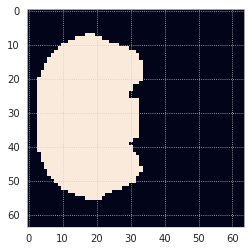

In [9]:
plt.imshow(m_indiv[..., 40])

In [10]:
_x = x[m_indiv][:, ab]
mean, sd = _x.mean(), _x.std()
x = (x - mean) / sd

In [11]:
_x.shape

(56788, 550)

In [12]:
mean, sd

(-4.649649239687157, 811.0637724944219)

In [13]:
x_mean = np.mean(x[m_indiv], 0)

[<matplotlib.lines.Line2D object at 0x7e97aeb6eac0>]

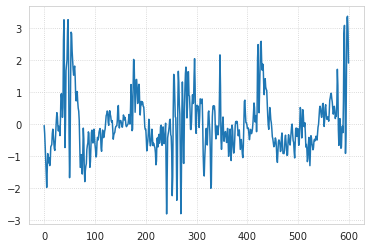

In [14]:
plt.plot(x_mean)

In [15]:
mice.setup_preproc_data(nogsr=False)
key, func = list(mice.bold_preproc.items())[0]

In [16]:
x = func[:]
x.shape

(64, 64, 78, 600)

In [17]:
_x = x[m_indiv][:, ab]
mean, sd = _x.mean(), _x.std()
x = (x - mean) / sd

In [18]:
mean, sd

(2.0049571595500444e-07, 45.15885238447949)

In [19]:
y_mean = np.mean(x[m_indiv], 0)

[<matplotlib.lines.Line2D object at 0x7f6e20cc59a0>]

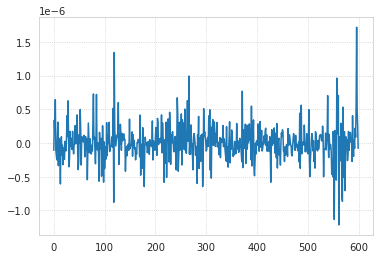

In [20]:
plt.plot(y_mean)

[<matplotlib.lines.Line2D object at 0x7f6e20c8cd60>]

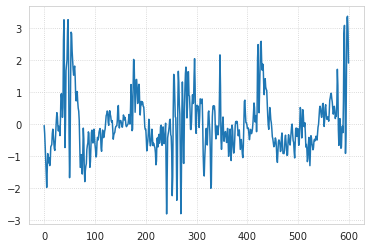

In [21]:
plt.plot(x_mean)

In [156]:
img = nib.load(pjoin(cfg.raw_dir, matches[12]))

In [158]:
x = img.get_fdata()

In [159]:
x.dtype

dtype('float64')

In [143]:
img

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78, 600)
         Spacing    : (0.2, 0.2, 0.2, 1.0)
         Origin     : (6.4, -6.2, -7.8, 0.0)
         Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [144]:
x = img.numpy()
x.shape

(64, 64, 78, 600)

In [145]:
x.dtype

dtype('float32')

<matplotlib.colorbar.Colorbar object at 0x7f25ac28dc40>

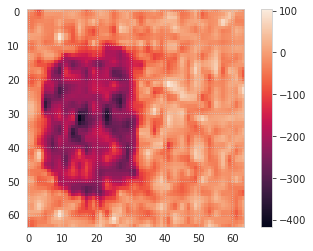

In [160]:
plt.imshow(x[..., 40, 121])
plt.colorbar()

In [43]:
mice.setup_anat_data()
mice.setup_preproc_data(nogsr=True)

In [44]:
m = mice.mask3d['sub-SLC01_ses-1']
m = m.load_ants('unsigned int')

In [45]:
f = mice.bold_preproc['sub-SLC01_ses-1_run-1']

In [47]:
f = f[:] * np.expand_dims(m.numpy(), -1)

In [48]:
f.shape

(64, 64, 78, 600)

<matplotlib.image.AxesImage object at 0x7f55c37c67c0>

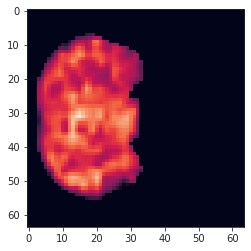

In [50]:
plt.imshow(f[..., 40, 124])

In [54]:
f_nans = np.where(np.expand_dims(m.numpy(), -1).astype(bool), f, np.nan)

In [55]:
f_nans.shape

(64, 64, 78, 600)

<matplotlib.image.AxesImage object at 0x7f55bbcbca00>

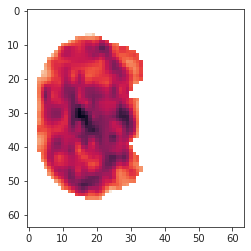

In [72]:
plt.imshow(f_nans[..., 40, 138])

In [73]:
f_mean = np.nanmean(f_nans.reshape(-1, f_nans.shape[-1]), 0)
f_mean.shape

(600,)

[<matplotlib.lines.Line2D object at 0x7f55b87cbeb0>]

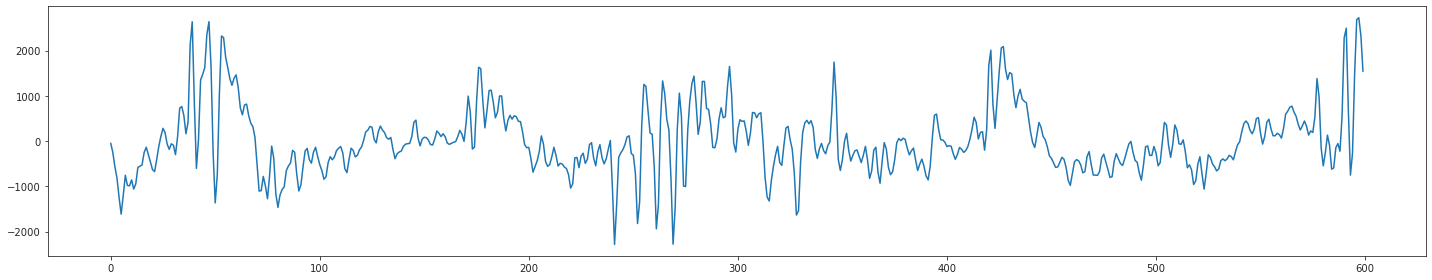

In [84]:
fig, ax = create_figure(1, 1, (20, 4))
plt.plot(f_mean)

In [76]:
np.argsort(np.abs(f_mean))[::-1][:10]

array([597, 596,  47,  39, 591,  46, 598,  53,  54, 241])

In [87]:
vminmax = np.max(np.abs(f))
vminmax

7225.06494140625

[<matplotlib.lines.Line2D object at 0x7f55b7d0b2e0>]

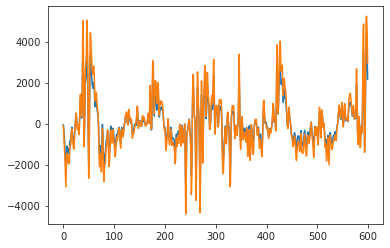

In [94]:
plt.plot(f[10, 20, 40])
plt.plot(f[10, 20, 30])

In [101]:
voxels = np.where(np.abs(f).mean(-1) > 0)
voxels = {
    idx: (i, j, k) for idx, (i, j, k)
    in enumerate(zip(*voxels), start=1)
}
len(voxels)

In [105]:
list(voxels.items())[:10]

[
    (1, (6, 20, 29)),
    (2, (7, 14, 32)),
    (3, (7, 14, 33)),
    (4, (7, 14, 34)),
    (5, (7, 14, 35)),
    (6, (7, 14, 36)),
    (7, (7, 14, 37)),
    (8, (7, 15, 30)),
    (9, (7, 15, 31)),
    (10, (7, 15, 32)),
    (11, (7, 15, 33)),
    (12, (7, 15, 34)),
    (13, (7, 15, 35)),
    (14, (7, 15, 36)),
    (15, (7, 15, 37)),
    (16, (7, 15, 38)),
    (17, (7, 16, 27)),
    (18, (7, 16, 28)),
    (19, (7, 16, 29)),
    (20, (7, 16, 30))
]

In [106]:
len(voxels)

49973

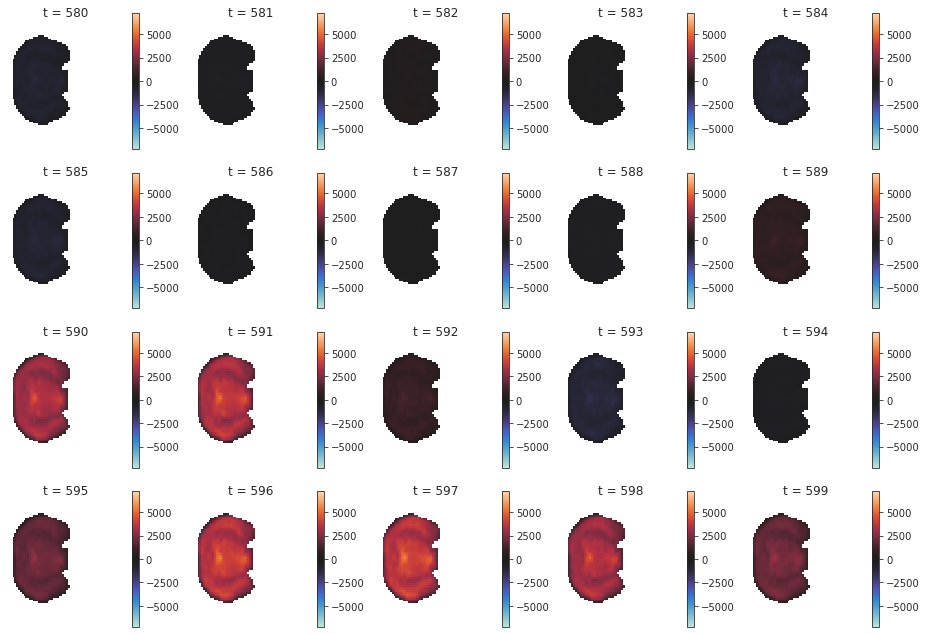

In [88]:
fig, axes = create_figure(4, 5, (13, 9))

for i, ax in enumerate(axes.flat):
    t = 580 + i
    ax.set_title(f"t = {t}")
    im = ax.imshow(f_nans[..., 40, t], vmin=-vminmax, vmax=vminmax, cmap='icefire')
    plt.colorbar(im, ax=ax)
remove_ticks(axes)
plt.show()

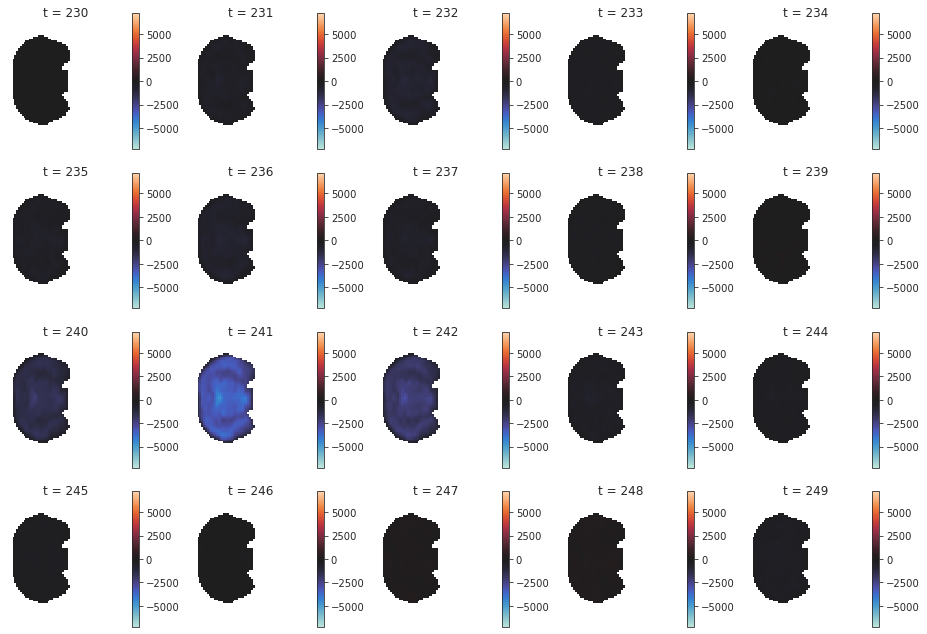

In [89]:
fig, axes = create_figure(4, 5, (13, 9))

for i, ax in enumerate(axes.flat):
    t = 230 + i
    ax.set_title(f"t = {t}")
    im = ax.imshow(f_nans[..., 40, t], vmin=-vminmax, vmax=vminmax, cmap='icefire')
    plt.colorbar(im, ax=ax)
remove_ticks(axes)
plt.show()

In [38]:
mice = Mice((192, 4))

In [39]:
mice.setup_preproc_data(nogsr=True)

In [43]:
vars(mice.bold_preproc['sub-SLC01_ses-1_run-7'])

{
    'cfg': <model.configuration.Config object at 0x7fee26529e80>,
    '_patterns': [
        'desc-nogsr',
        'bold',
        'sub-SLC01_ses-1_run-7',
        'space-individual'
    ],
    'key': 'sub-SLC01_ses-1_run-7',
    'mode': 'bold',
    'space': 'individual',
    'npy_dir': '/mnt/storage/hadi/Ca-fMRI/npy',
    'nii_file': None,
    'npy_file': None,
    'dtype': <class 'float'>,
    '_npy': None,
    'shape': None,
    'task': None
}

In [44]:
df

,"SLC – session 3, N=10",Final_ID (data24/),fMRI_ID,calcium_ID,fMRI_ID.1,calcium_ID.1,Notes,LED stim.,Rest runs,LW,Spike2_filenames
0,20190122_165747_2019_01_22_tigre1_Black_1_1,BIS_output_SLC02-03,BIS_output_SLC01-03,animal01,BIS_output_SLC02-03,animal06,"Lots of motion in Ca data (exclude?), angio lo...","7,11,15","5,9,13,17",36.6,"704, 706, 708, 710, 712, 714, 715"
1,20190123_145514_2019_01_23_tigre1_Black1_1_1,BIS_output_SLC01-03,BIS_output_SLC02-03,animal02,BIS_output_SLC01-03,animal01,"Ca data fine, angio okay","7,11,15","5,9,13,17",31.7,"745, 747, 749, 751, 753, 755, 757"
2,20190123_085640_2019_01_23_tigre1_yellow_1_1_1,BIS_output_SLC03-03,BIS_output_SLC03-03,animal03,BIS_output_SLC03-03,animal04,"Motion good, surgery poor (reflection), UV goo...","7,11,16","5,9,13,17",36.6,"717, 719, 721, 723, 725, 727, 729"
3,20190123_115916_2019_01_23_tigre1_yellow2_1_1,BIS_output_SLC04-03,BIS_output_SLC04-03,animal04,BIS_output_SLC04-03,animal03,"UV signal, anterior region poor, angio okay, e...","7,11,15","5,9,13,17",31.7,"731, 733, 735, 737, 739, 741, 743"
4,20190129_155337_2019_01_29_tigre1_yellow3_1_1,BIS_output_SLC05-03,BIS_output_SLC05-03,animal05,BIS_output_SLC05-03,animal05,"Angio good (poor vessels), window okay, UV oka...","8,10,14","6,12,16,18",36.6,"789, 791, 793, 795, 797, 798, 799"
5,20190123_175300_2019_01_23_tigre1_Black2_1_1 C...,BIS_output_SLC06-03,BIS_output_SLC06-03,animal06,BIS_output_SLC06-03,animal02,"E7 - no Ca data (missed trigger), UV signal, s...","7,11,15","5,9,13,18",34.2,"759, 761*noCa*, 763, 765, 767, 769, 772"
6,20190424_082615_2019_04_24_SLC3_mouse57_1_1,BIS_output_SLC08-03,BIS_output_SLC08-03,animal57,BIS_output_SLC08-03,animal57,"Ca looks good, held in place with some glue, a...","7,11,18","5,9,13,17",41.5,"127, 129, 131, 133, 135, 138, 140"
7,20190424_113356_2019_04_24_SLC3_mouse56_1_1,BIS_output_SLC09-03,BIS_output_SLC09-03,animal56,BIS_output_SLC09-03,animal56,EPI data look good,"7,11,15","5,9,13,17",39.1,"142, 144, 146, 148, 150, 152, 154"
8,20190424_143043_2019_04_24_SLC3_mouse55_1_1,BIS_output_SLC07-03,BIS_output_SLC07-03,animal55,BIS_output_SLC07-03,animal55,Big problem at rear - tumor? Inflammation? - v...,"7,11,15","5,18,13,17",41.5,"156, 158, 159, 161, 163, 165, 167"
9,20190529_153936_2019_05_29_SLC3_mouse73_1_1,BIS_output_SLC10-03,BIS_output_SLC10-03,animal73,BIS_output_SLC10-03,animal73,NaN,"7,11,15","5,9,13,17",43.9,"478, 480, 482, 484, 486, 488, 490"


In [50]:
for i in df.iterrows():
    i

In [58]:
df[['SLC – session 3, N=10']]

,"SLC – session 3, N=10"
0,20190122_165747_2019_01_22_tigre1_Black_1_1
1,20190123_145514_2019_01_23_tigre1_Black1_1_1
2,20190123_085640_2019_01_23_tigre1_yellow_1_1_1
3,20190123_115916_2019_01_23_tigre1_yellow2_1_1
4,20190129_155337_2019_01_29_tigre1_yellow3_1_1
5,20190123_175300_2019_01_23_tigre1_Black2_1_1 C...
6,20190424_082615_2019_04_24_SLC3_mouse57_1_1
7,20190424_113356_2019_04_24_SLC3_mouse56_1_1
8,20190424_143043_2019_04_24_SLC3_mouse55_1_1
9,20190529_153936_2019_05_29_SLC3_mouse73_1_1


### Rename to have gsr or nogsr instead of preproc

In [32]:
import fnmatch

def rename_preproc_ca(cfg):
    names = fnmatch.filter(
        names=sorted(os.listdir(cfg.raw_dir)),
        pat='*_space-individual_desc-preproc_ca2.nii.gz',
    )
    ctr = 0
    for name in names:
        new_name = name.replace('preproc', 'nogsr')
        if name != new_name:
            ctr += 1
            os.rename(
                src=pjoin(cfg.raw_dir, name),
                dst=pjoin(cfg.raw_dir, new_name),
            )
    print(f"A total of {ctr} files were renamed.")
    
    names = fnmatch.filter(
        names=sorted(os.listdir(cfg.npy_dir)),
        pat='*_space-individual_desc-preproc_ca2.npy',
    )
    ctr = 0
    for name in names:
        new_name = name.replace('preproc', 'nogsr')
        if name != new_name:
            ctr += 1
            os.rename(
                src=pjoin(cfg.npy_dir, name),
                dst=pjoin(cfg.npy_dir, new_name),
            )
    print(f"A total of {ctr} files were renamed.")
    
    return


def rename_preproc_bold(cfg):
    names = fnmatch.filter(
        names=sorted(os.listdir(cfg.raw_dir)),
        pat='*_space-individual_desc-preproc_bold.nii.gz',
    )
    ctr = 0
    for name in names:
        new_name = name.replace('preproc', 'gsr')
        if name != new_name:
            ctr += 1
            os.rename(
                src=pjoin(cfg.raw_dir, name),
                dst=pjoin(cfg.raw_dir, new_name),
            )
    print(f"A total of {ctr} files were renamed.")
    
    names = fnmatch.filter(
        names=sorted(os.listdir(cfg.npy_dir)),
        pat='*_space-individual_desc-preproc_bold.npy',
    )
    ctr = 0
    for name in names:
        new_name = name.replace('preproc', 'gsr')
        if name != new_name:
            ctr += 1
            os.rename(
                src=pjoin(cfg.npy_dir, name),
                dst=pjoin(cfg.npy_dir, new_name),
            )
    print(f"A total of {ctr} files were renamed.")
    
    return

In [36]:
rename_preproc_ca(cfg)

A total of 0 files were renamed.

A total of 0 files were renamed.

In [37]:
rename_preproc_bold(cfg)

A total of 0 files were renamed.

A total of 0 files were renamed.